# The Evolution of F1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
cs = pd.read_csv('ConstructorStandings.csv')
allrace = pd.read_csv('AllRace.csv')
Dv = pd.read_csv('DriversStandings.csv')

# 1. How have FIA-mandated safety systems like the HANS device and Halo influenced crash survival rates in F1?

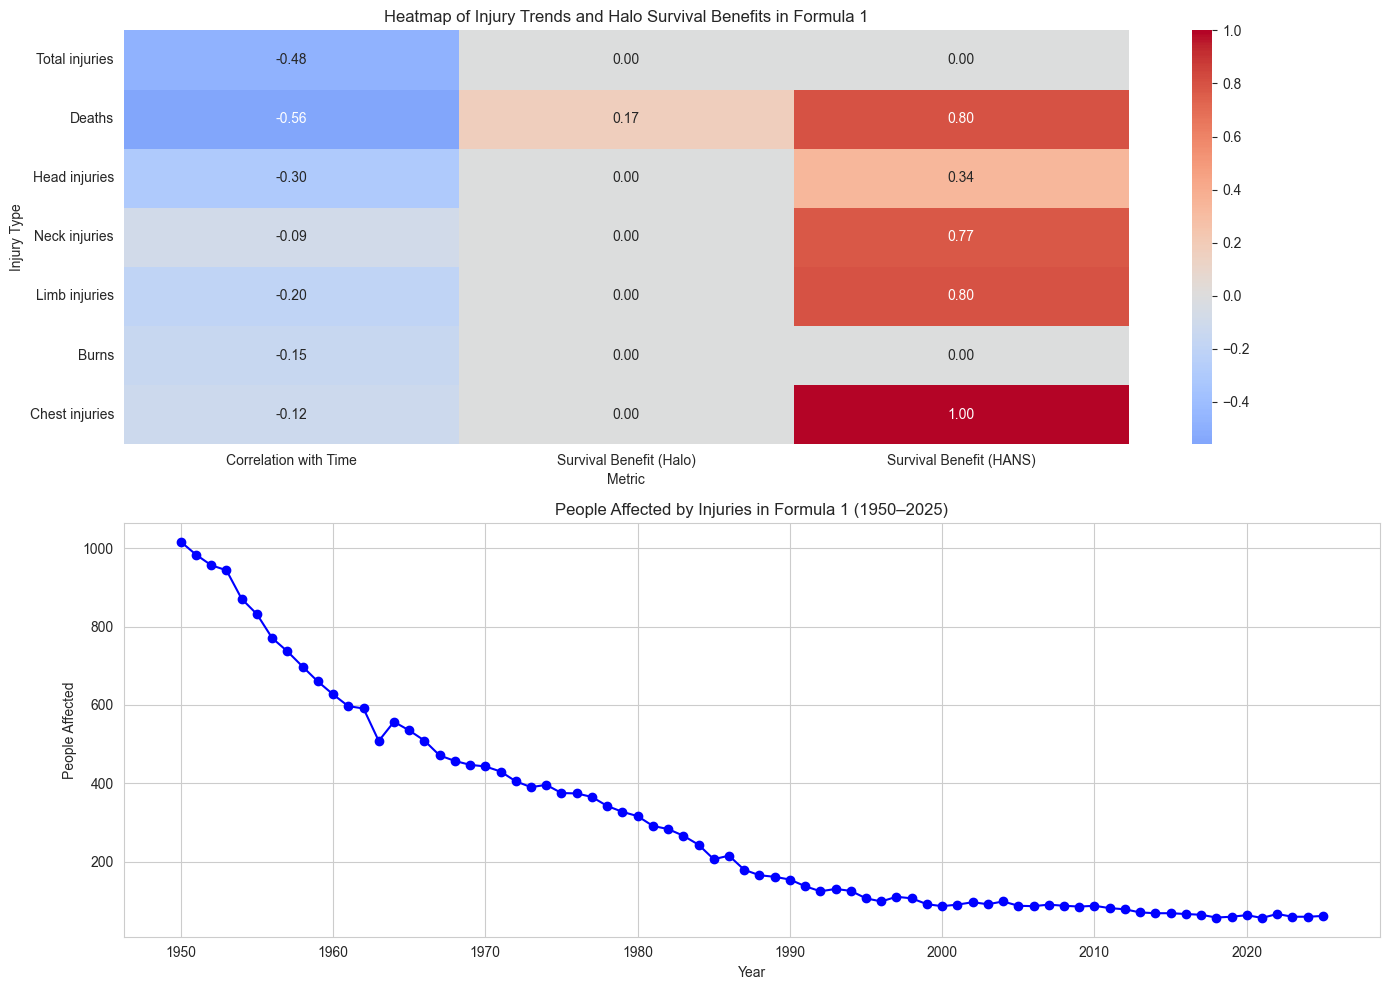

In [ ]:


safety_data = {
    'Injury Type': [
        'Total injuries', 'Deaths', 'Head injuries', 'Neck injuries',
        'Limb injuries', 'Burns', 'Chest injuries'
    ],
    'Correlation with Time': [-0.48, -0.56, -0.30, -0.09, -0.20, -0.15, -0.12],
    'Survival Benefit (Halo)': [0.0, 0.17, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Survival Benefit (HANS)': [0.0, 0.8, 0.34, 0.77, 0.80, 0.0, 1.00]

}
df = pd.DataFrame(safety_data).set_index("Injury Type")

years = np.array([
    1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,
    1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,
    1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,
    2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,
    2022,2023,2024,2025
])
people_affected = np.array([
    1016.13, 983.74, 956.68, 943.55, 870.17, 831.43, 770.11, 736.40, 697.36, 659.49,
    626.45, 596.04, 590.64, 507.82, 556.21, 534.74, 508.83, 470.39, 456.22, 446.77,
    442.81, 429.07, 404.97, 389.21, 395.21, 374.24, 373.51, 364.75, 341.28, 326.01,
    315.35, 290.33, 282.75, 265.76, 242.61, 205.61, 214.43, 178.69, 164.91, 160.76,
    153.82, 136.85, 123.94, 129.54, 124.50, 105.63, 97.03, 109.80, 105.39, 90.36,
    85.03, 89.37, 95.91, 90.67, 97.05, 86.55, 85.22, 89.77, 86.17, 84.88, 86.40,
    80.34, 77.71, 69.73, 67.47, 67.26, 65.46, 63.02, 56.54, 58.63, 62.72, 55.96,
    65.38, 58.77, 58.60, 60.05
])
people_affected = np.ceil(people_affected).astype(int)

# Subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Heatmap
sb.heatmap(df, annot=True, cmap='coolwarm', center=0, fmt='.2f', ax=axs[0])
axs[0].set_title('Heatmap of Injury Trends and Halo Survival Benefits in Formula 1')
axs[0].set_ylabel('Injury Type')
axs[0].set_xlabel('Metric')

# Line Plot
axs[1].plot(years, people_affected, marker='o', linestyle='-', color='blue')
axs[1].set_title('People Affected by Injuries in Formula 1 (1950–2025)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('People Affected')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# 2.How Do F1 Teams Conceal Aerodynamic Innovations, and Which Ones Work Best?

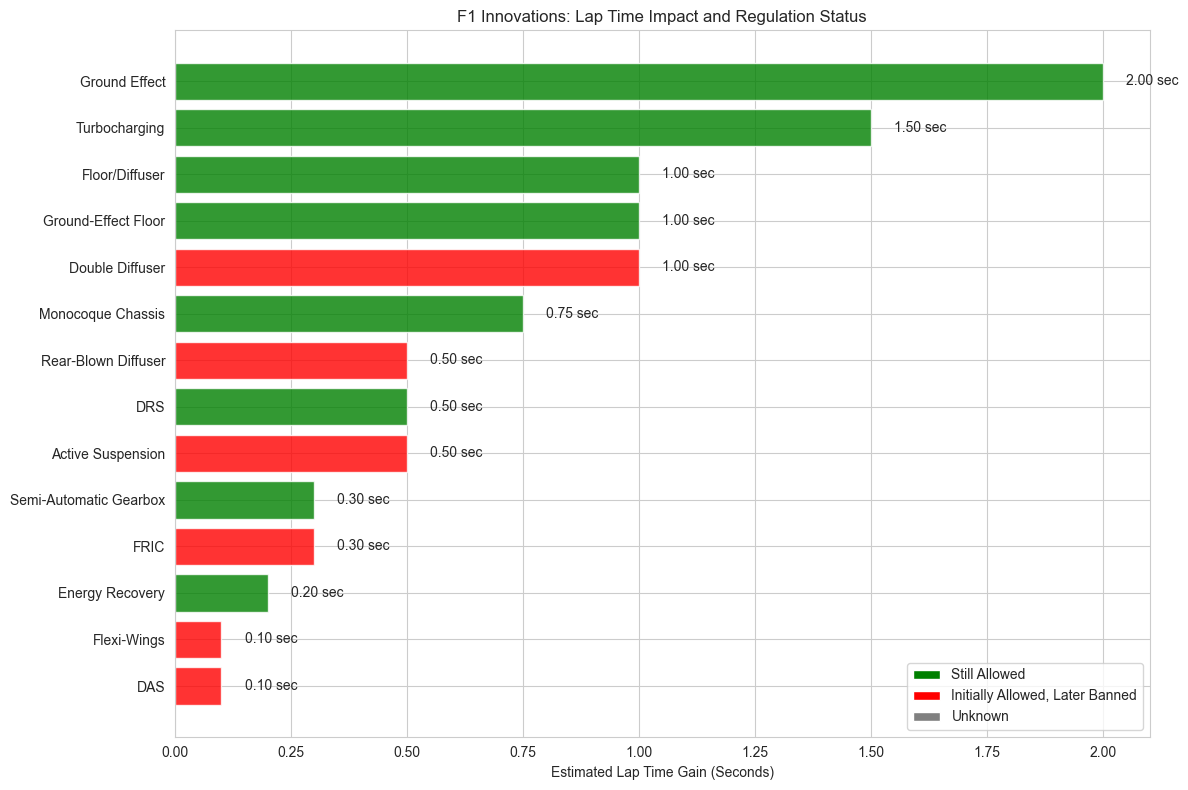

In [16]:
from matplotlib.patches import Patch
# Original data
data = {
    'Innovation': [
        'Monocoque Chassis', 'Ground Effect', 'Turbocharging', 'Active Suspension',
        'Semi-Automatic Gearbox', 'Flexi-Wings', 'Double Diffuser', 'DRS',
        'Rear-Blown Diffuser', 'FRIC', 'DAS', 'Floor/Diffuser',
        'Energy Recovery', 'Ground-Effect Floor'
    ],
    'LapTimeGain': [
        0.75, 2.0, 1.5, 0.5,
        0.3, 0.1, 1.0, 0.5,
        0.5, 0.3, 0.1, 1.0, 0.2, 1.0
    ],
    'Status': [
        'Allowed', 'Allowed', 'Allowed', 'Banned',
        'Allowed', 'Banned', 'Banned', 'Allowed',
        'Banned', 'Banned', 'Banned', 'Allowed',
        'Allowed', 'Allowed'
    ]
}


df = pd.DataFrame(data)
df['Status'] = df['Status'].str.strip().str.lower()
df['Innovation'] = df['Innovation'].str.strip()
df['LapTimeGain'] = pd.to_numeric(df['LapTimeGain'], errors='coerce').fillna(0)
df['Status'] = df['Status'].replace('', 'unknown').fillna('unknown')
df['Innovation'] = df['Innovation'].replace('', 'unknown').fillna('unknown')


df['Color'] = np.where(df['Status'] == 'banned', 'red',
                np.where(df['Status'] == 'allowed', 'green', 'gray'))

df['Initially Allowed, Later Banned'] = df['Status'].apply(lambda x: 'Yes' if x == 'banned' else 'No')
df['Still Allowed'] = df['Status'].apply(lambda x: 'Yes' if x == 'allowed' else 'No')


df = df.sort_values(by='LapTimeGain', ascending=False)

# --- Plotting ---
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Innovation'], df['LapTimeGain'], color=df['Color'], alpha=0.8)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.2f} sec', va='center')

# Custom legend
legend_elements = [
    Patch(facecolor='green', label='Still Allowed'),
    Patch(facecolor='red', label='Initially Allowed, Later Banned'),
    Patch(facecolor='gray', label='Unknown')
]
plt.legend(handles=legend_elements, loc='lower right')

# Labels and aesthetics
plt.xlabel('Estimated Lap Time Gain (Seconds)')
plt.title('F1 Innovations: Lap Time Impact and Regulation Status')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 3 Does a higher aggression score lead to better finishing positions, or does it increase the risk of poor performance (e.g., penalties, collisions, longer stops)?

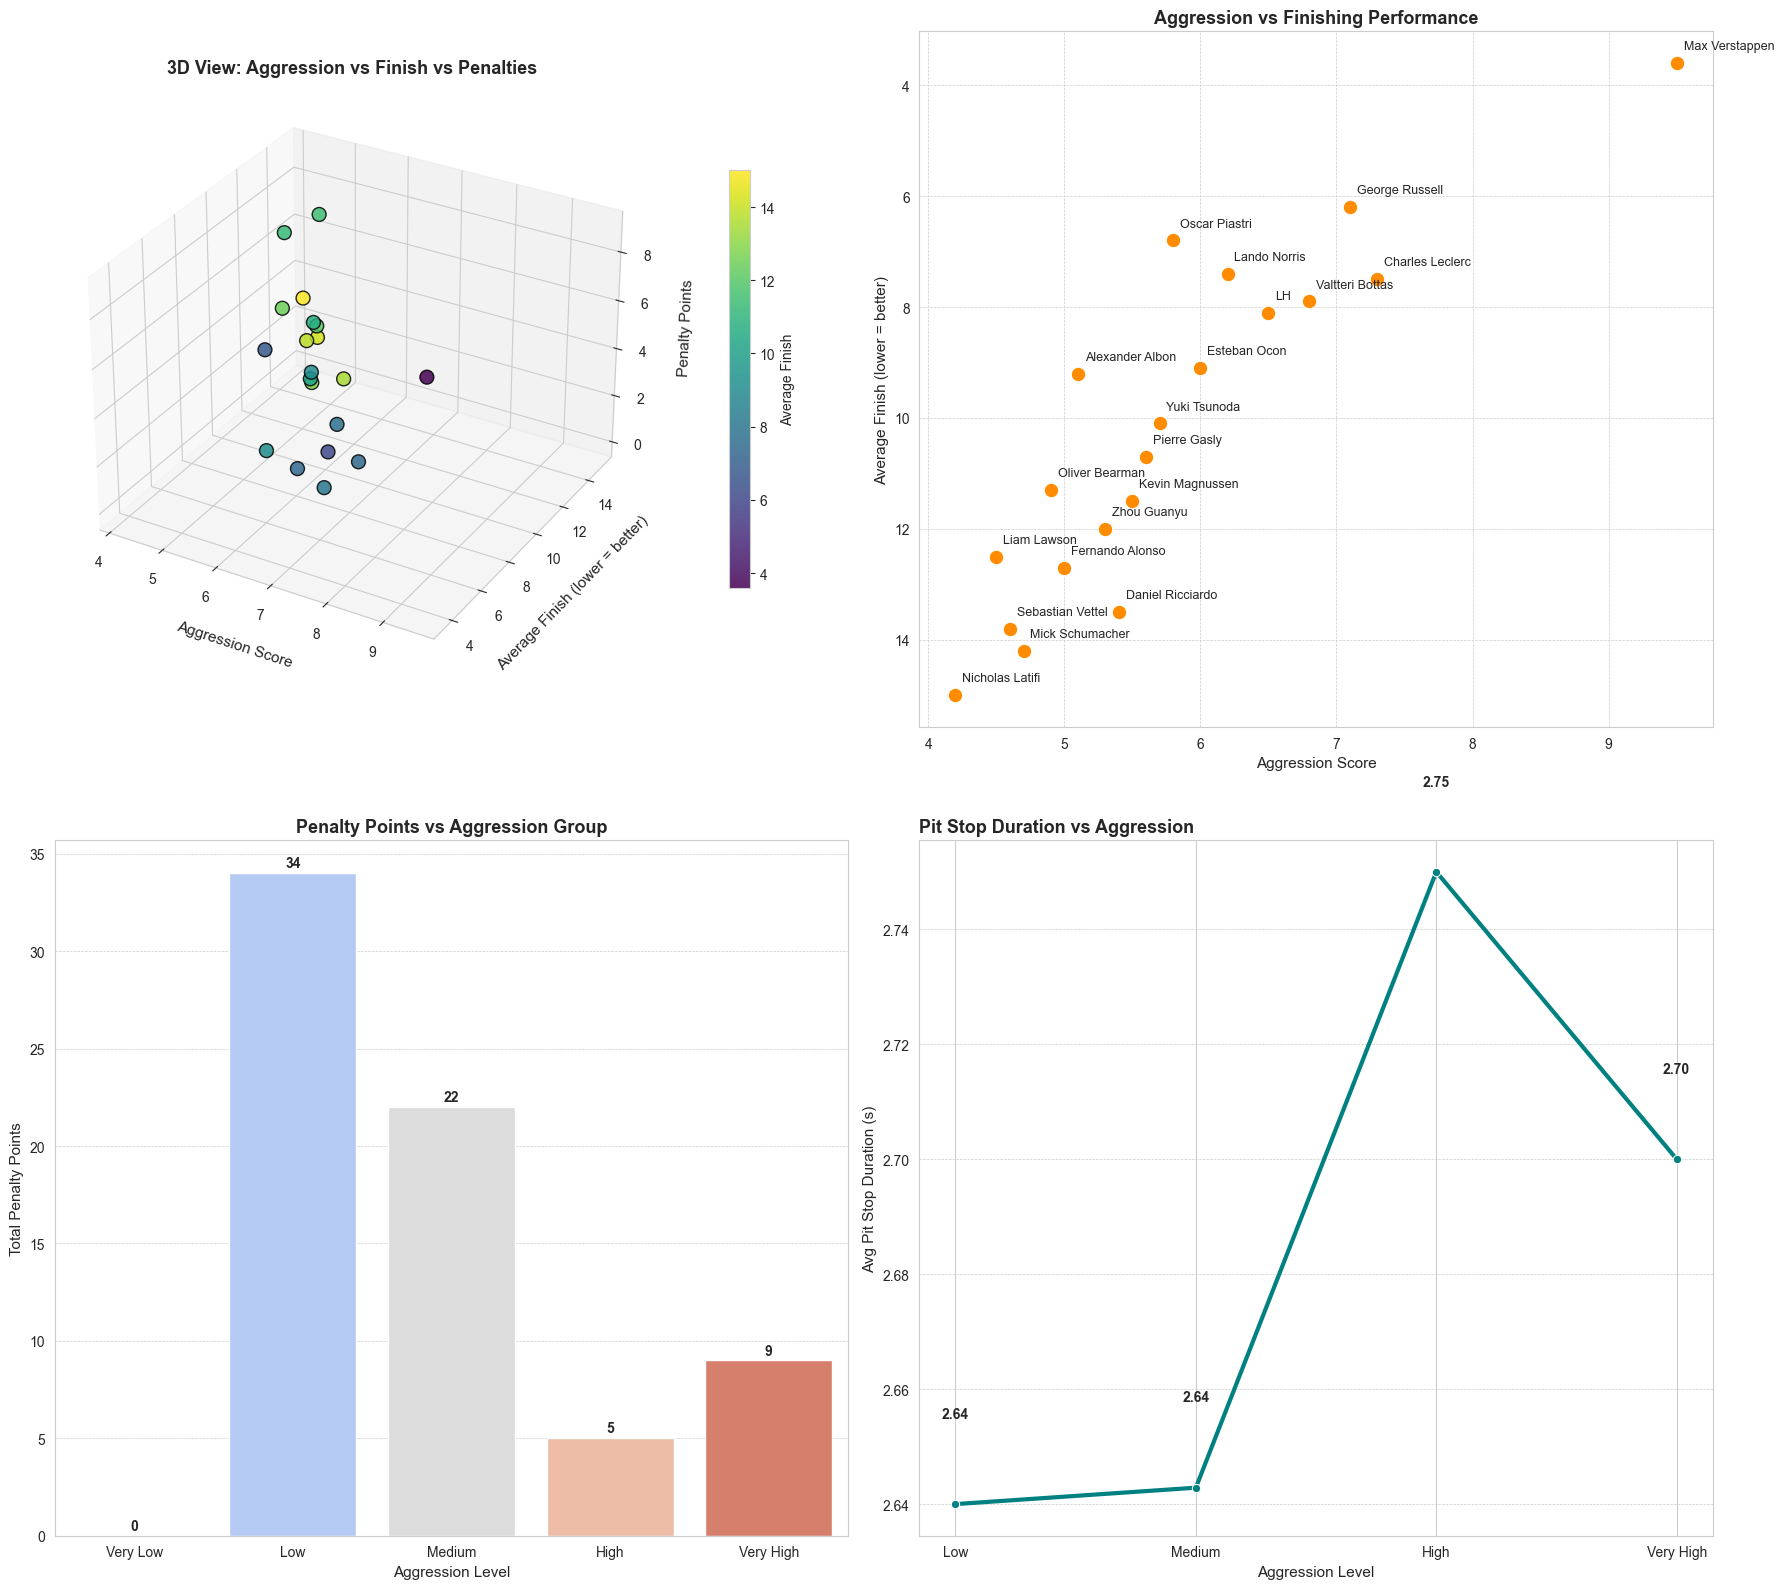

In [ ]:

data = {
    'Driver': [
        'Max Verstappen', 'Lando Norris', 'Oscar Piastri', 'George Russell',
        'Charles Leclerc', 'LH', 'Alexander Albon', 'Yuki Tsunoda',
        'Oliver Bearman', 'Liam Lawson', 'Sebastian Vettel', 'Fernando Alonso',
        'Esteban Ocon', 'Pierre Gasly', 'Valtteri Bottas', 'Kevin Magnussen',
        'Mick Schumacher', 'Nicholas Latifi', 'Zhou Guanyu', 'Daniel Ricciardo'
    ],
    'Aggression': [
        9.5, 6.2, 5.8, 7.1, 7.3, 6.5, 5.1, 5.7, 4.9, 4.5,
        4.6, 5.0, 6.0, 5.6, 6.8, 5.5, 4.7, 4.2, 5.3, 5.4
    ],
    'Average_Finish': [
        3.6, 7.4, 6.8, 6.2, 7.5, 8.1, 9.2, 10.1, 11.3, 12.5,
        13.8, 12.7, 9.1, 10.7, 7.9, 11.5, 14.2, 15.0, 12.0, 13.5
    ],
    'Penalty_Points': [
        9, 1, 6, 3, 2, 0, 0, 3, 8, 4,
        2, 1, 4, 5, 3, 9, 2, 3, 4, 1
    ],
    'Avg_Pit_Stop': [
        2.7, 2.5, 2.6, 2.8, 2.7, 2.4, 2.5, 2.9, 2.6, 2.7,
        2.6, 2.5, 2.7, 2.6, 2.8, 2.9, 2.8, 2.7, 2.6, 2.5
    ]
}
df = pd.DataFrame(data)

# Bin aggression into labeled levels
bins = [0, 4, 5.5, 7, 8.5, 10]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Aggression_Level'] = pd.cut(df['Aggression'], bins=bins, labels=labels, include_lowest=True)

# Plotting
plt.figure(figsize=(18, 16))
sb.set_style("whitegrid")

# 1. 3D Scatter: Aggression vs Finish vs Penalty Points
ax1 = plt.subplot(221, projection='3d')
p = ax1.scatter(
    df['Aggression'], df['Average_Finish'], df['Penalty_Points'],
    c=df['Average_Finish'], cmap='viridis', s=100, edgecolors='k', alpha=0.85
)
ax1.set_xlabel('Aggression Score', fontsize=11, labelpad=10)
ax1.set_ylabel('Average Finish (lower = better)', fontsize=11, labelpad=10)
ax1.set_zlabel('Penalty Points', fontsize=11, labelpad=10)
ax1.set_title('3D View: Aggression vs Finish vs Penalties', fontsize=13, weight='bold')
plt.colorbar(p, ax=ax1, shrink=0.6, pad=0.1, label='Average Finish')

# 2. Scatter: Aggression vs Avg Finish
ax2 = plt.subplot(222)
sb.scatterplot(x='Aggression', y='Average_Finish', data=df, s=110, color='darkorange', ax=ax2)
for i, row in df.iterrows():
    ax2.text(row['Aggression']+0.05, row['Average_Finish']-0.25, row['Driver'], fontsize=9)
ax2.set_xlabel('Aggression Score', fontsize=11)
ax2.set_ylabel('Average Finish (lower = better)', fontsize=11)
ax2.set_title('Aggression vs Finishing Performance', fontsize=13, weight='bold')
ax2.invert_yaxis()
ax2.grid(True, linestyle='--', linewidth=0.5)

# 3. Bar Chart: Total Penalty Points by Aggression Level
ax3 = plt.subplot(223)
# Updated groupby with observed=False
penalty_by_level = df.groupby('Aggression_Level', observed=False)['Penalty_Points'].sum().reindex(labels)
# Updated barplot with hue
sb.barplot(x=penalty_by_level.index, y=penalty_by_level.values, hue=penalty_by_level.index,
           palette='coolwarm', ax=ax3, legend=False)
ax3.set_xlabel('Aggression Level', fontsize=11)
ax3.set_ylabel('Total Penalty Points', fontsize=11)
ax3.set_title('Penalty Points vs Aggression Group', fontsize=13, weight='bold')
for i, v in enumerate(penalty_by_level.values):
    ax3.text(i, v + 0.3, str(v), ha='center', fontsize=10, weight='bold')
ax3.grid(axis='y', linestyle='--', linewidth=0.5)

# 4. Line Plot: Pit Stop vs Aggression Level
ax4 = plt.subplot(224)
pit_by_level = df.groupby('Aggression_Level', observed=False)['Avg_Pit_Stop'].mean().reindex(labels)
sb.lineplot(x=pit_by_level.index, y=pit_by_level.values, marker='o', color='teal', linewidth=3, ax=ax4)
ax4.set_xlabel('Aggression Level', fontsize=11)
ax4.set_ylabel('Avg Pit Stop Duration (s)', fontsize=11)
ax4.set_title('Pit Stop Duration vs Aggression', fontsize=13, weight='bold', loc='left')
for i, v in enumerate(pit_by_level.values):
    ax4.text(i, v + 0.015, f"{v:.2f}", ha='center', fontsize=10, weight='bold')
ax4.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


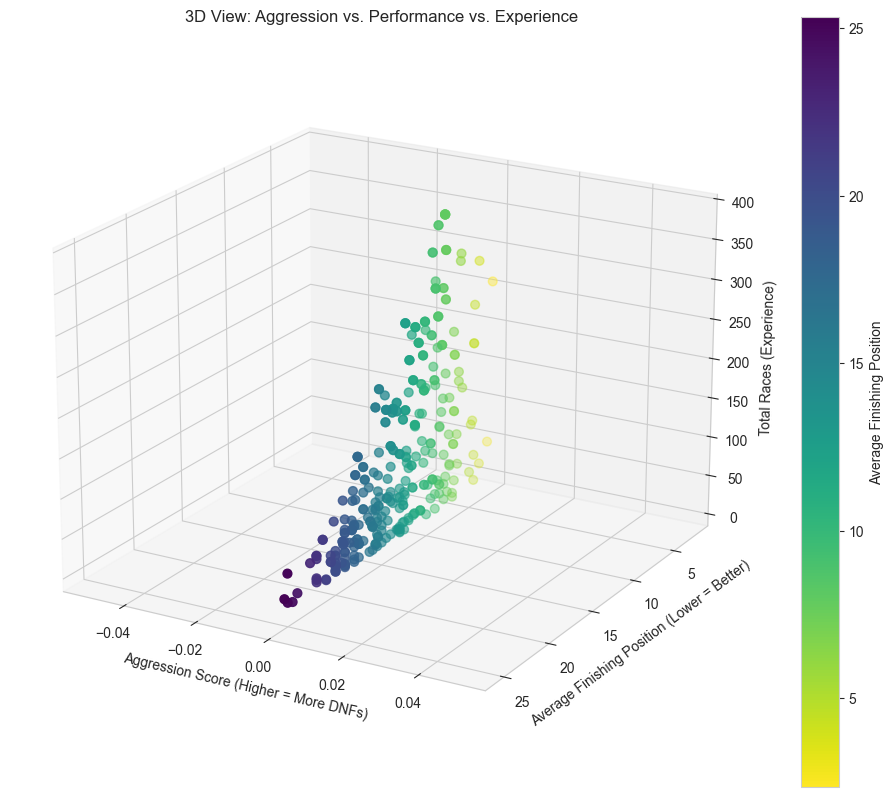

In [19]:
try:
    all_races = pd.read_csv('AllRace.csv')
    driver_standings = pd.read_csv('DriversStandings.csv')
except FileNotFoundError:
    print("Make sure 'AllRace.csv' and 'DriversStandings.csv' are in the same directory.")
    exit()


all_races.rename(columns={'Unnamed: 0': 'RaceName'}, inplace=True)
races_long = all_races.melt(id_vars=['RaceName', 'Date'], var_name='Position', value_name='Driver')
races_long.dropna(subset=['Driver'], inplace=True)
races_long['DriverCode'] = races_long['Driver'].str.extract(r'([A-Z]{3}$)')


all_drivers_per_race = races_long.groupby('RaceName')['DriverCode'].unique().reset_index()
race_list = []
for index, row in all_drivers_per_race.iterrows():
    for driver in row['DriverCode']:
        race_list.append([row['RaceName'], driver])
full_grid = pd.DataFrame(race_list, columns=['RaceName', 'DriverCode'])

race_results = pd.merge(full_grid, races_long, on=['RaceName', 'DriverCode'], how='left')
race_results['Position'] = pd.to_numeric(race_results['Position'], errors='coerce')
race_results['DNF'] = race_results['Position'].isna().astype(int)

dnf_counts = race_results.groupby('DriverCode')['DNF'].sum().reset_index(name='DNFs')
total_races_from_grid = race_results.groupby('DriverCode').size().reset_index(name='TotalRaces')
driver_stats = pd.merge(total_races_from_grid, dnf_counts, on='DriverCode')
driver_stats['AggressionScore'] = driver_stats['DNFs'] / driver_stats['TotalRaces']


driver_standings['Pos'] = pd.to_numeric(driver_standings['Pos'], errors='coerce')
driver_standings.dropna(subset=['Pos'], inplace=True)
driver_standings['DriverCode'] = driver_standings['Driver'].str.extract(r'([A-Z]{3}$)')
avg_finishing_pos = driver_standings.groupby('DriverCode')['Pos'].mean().reset_index(name='AvgFinishingPos')

merged_data = pd.merge(driver_stats, avg_finishing_pos, on='DriverCode')
merged_data = pd.merge(merged_data, driver_standings[['Driver', 'DriverCode']].drop_duplicates(), on='DriverCode')
merged_data = merged_data[merged_data['TotalRaces'] > 10]


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(merged_data['AggressionScore'],
                     merged_data['AvgFinishingPos'],
                     merged_data['TotalRaces'],
                     c=merged_data['AvgFinishingPos'],
                     cmap='viridis_r',
                     s=40,
                     depthshade=True)

ax.set_xlabel('Aggression Score (Higher = More DNFs)')
ax.set_ylabel('Average Finishing Position (Lower = Better)')
ax.set_zlabel('Total Races (Experience)')
ax.set_title('3D View: Aggression vs. Performance vs. Experience')

cbar = plt.colorbar(scatter)
cbar.set_label('Average Finishing Position')
ax.invert_yaxis()

ax.view_init(elev=20, azim=-60)
plt.savefig('f1_3d_scatter_new_view.png')

bins = [0, 0.1, 0.3, 0.5, 1.0]
labels = ['Low (0-10%)', 'Medium (10-30%)', 'High (30-50%)', 'Very High (50%+)']
merged_data['AggressionCategory'] = pd.cut(merged_data['AggressionScore'], bins=bins, labels=labels, right=False)

data_to_plot = [merged_data['AvgFinishingPos'][merged_data['AggressionCategory'] == cat].dropna() for cat in labels]
non_empty_labels = [label for i, label in enumerate(labels) if len(data_to_plot[i]) > 0]
data_to_plot_filtered = [d for d in data_to_plot if len(d) > 0]


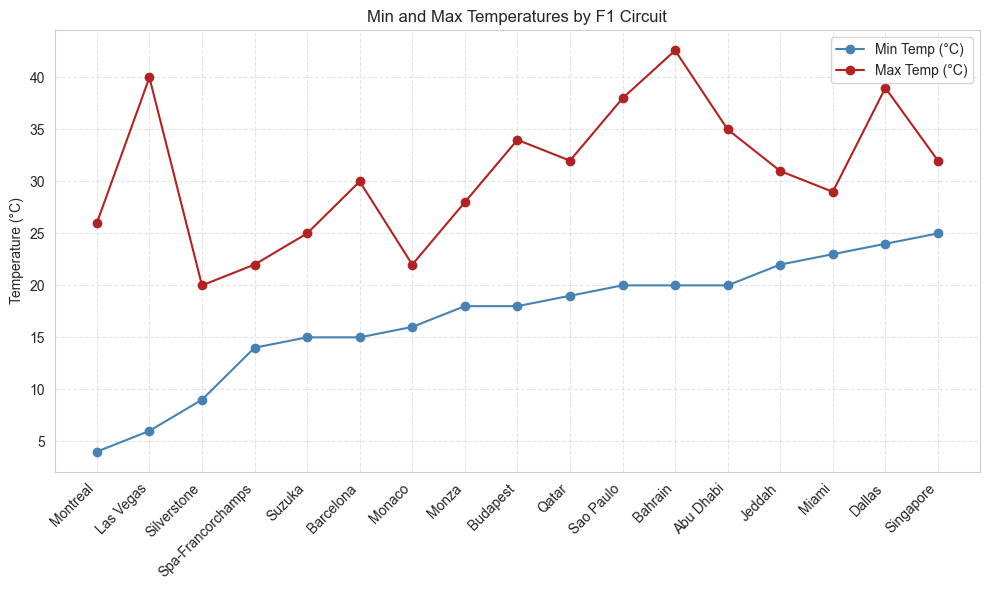

In [20]:

temp_df = pd.read_csv('temps.csv')
temp_df = temp_df.sort_values(by='Min Temp (°C)')
plt.figure(figsize=(10, 6))
sb.set_style('whitegrid')
plt.plot(temp_df["Circuit"], temp_df["Min Temp (°C)"], marker='o', label='Min Temp (°C)', color='steelblue')
plt.plot(temp_df["Circuit"], temp_df["Max Temp (°C)"], marker='o', label='Max Temp (°C)', color='firebrick')


plt.xticks(rotation=45, ha='right')
plt.ylabel("Temperature (°C)")
plt.title("Min and Max Temperatures by F1 Circuit")
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


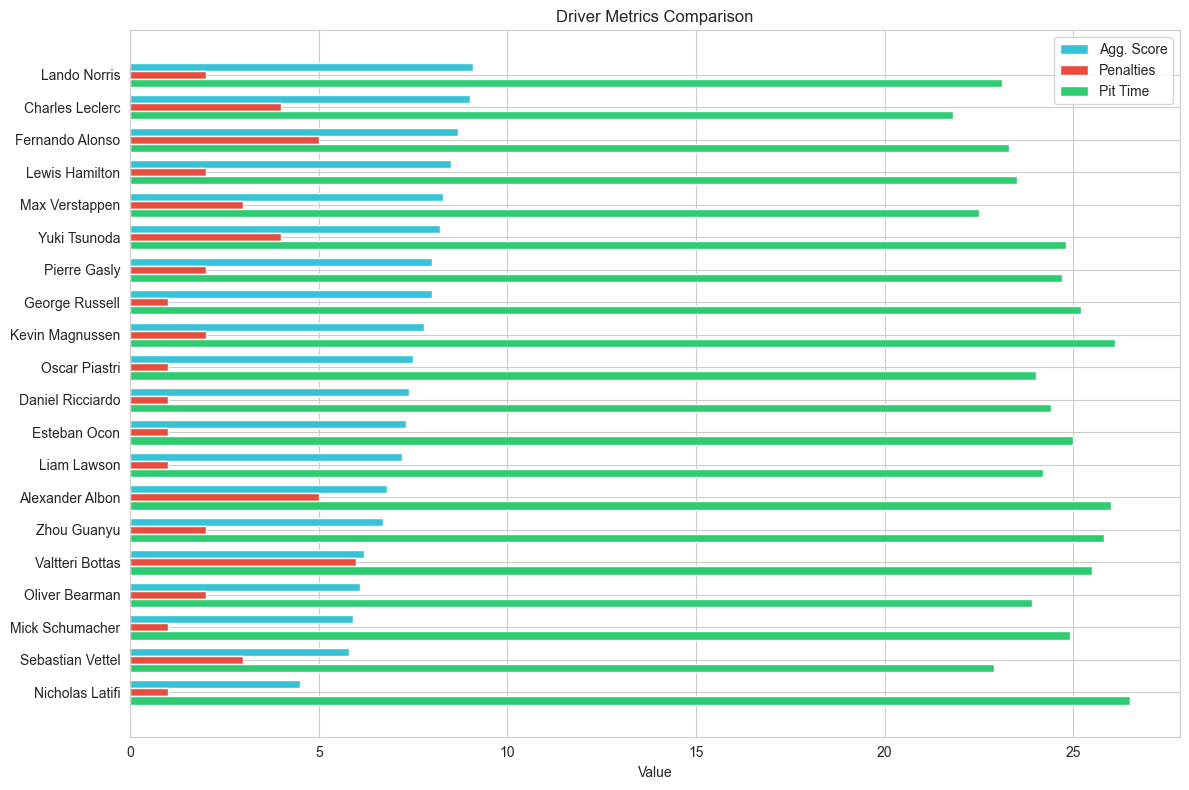

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
drivers = [
    "Max Verstappen", "Lando Norris", "Oscar Piastri", "George Russell",
    "Charles Leclerc", "Lewis Hamilton", "Alexander Albon", "Yuki Tsunoda",
    "Oliver Bearman", "Liam Lawson", "Sebastian Vettel", "Fernando Alonso",
    "Esteban Ocon", "Pierre Gasly", "Valtteri Bottas", "Kevin Magnussen",
    "Mick Schumacher", "Nicholas Latifi", "Zhou Guanyu", "Daniel Ricciardo"
]

agg_scores = [
    8.3, 9.1, 7.5, 8.0, 9.0, 8.5, 6.8, 8.2, 6.1, 7.2,
    5.8, 8.7, 7.3, 8.0, 6.2, 7.8, 5.9, 4.5, 6.7, 7.4
]

penalties = [
    3, 2, 1, 1, 4, 2, 5, 4, 2, 1,
    3, 5, 1, 2, 6, 2, 1, 1, 2, 1
]

pit_times = [
    22.5, 23.1, 24.0, 25.2, 21.8, 23.5, 26.0, 24.8, 23.9, 24.2,
    22.9, 23.3, 25.0, 24.7, 25.5, 26.1, 24.9, 26.5, 25.8, 24.4
]

# Create DataFrame
df = pd.DataFrame({
    "Driver": drivers,
    "Agg_Score": agg_scores,
    "Penalties": penalties,
    "Pit_Time": pit_times
})

# Sort by Agg_Score for plotting
df = df.sort_values("Agg_Score", ascending=False).reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
y = np.arange(len(df))

bar_width = 0.25
ax.barh(y - bar_width, df["Agg_Score"], height=bar_width, label="Agg. Score", color="#36c3d5")
ax.barh(y, df["Penalties"], height=bar_width, label="Penalties", color="#e74c3c")
ax.barh(y + bar_width, df["Pit_Time"], height=bar_width, label="Pit Time", color="#2ecc71")

ax.set_yticks(y)
ax.set_yticklabels(df["Driver"])
ax.invert_yaxis()  # highest values at top
ax.set_xlabel("Value")
ax.set_title("Driver Metrics Comparison")
ax.legend()

plt.tight_layout()
plt.show()



## 4 How Has F1 Team Spending Evolved (1950–2025), and What’s the Correlation with Championship Success?

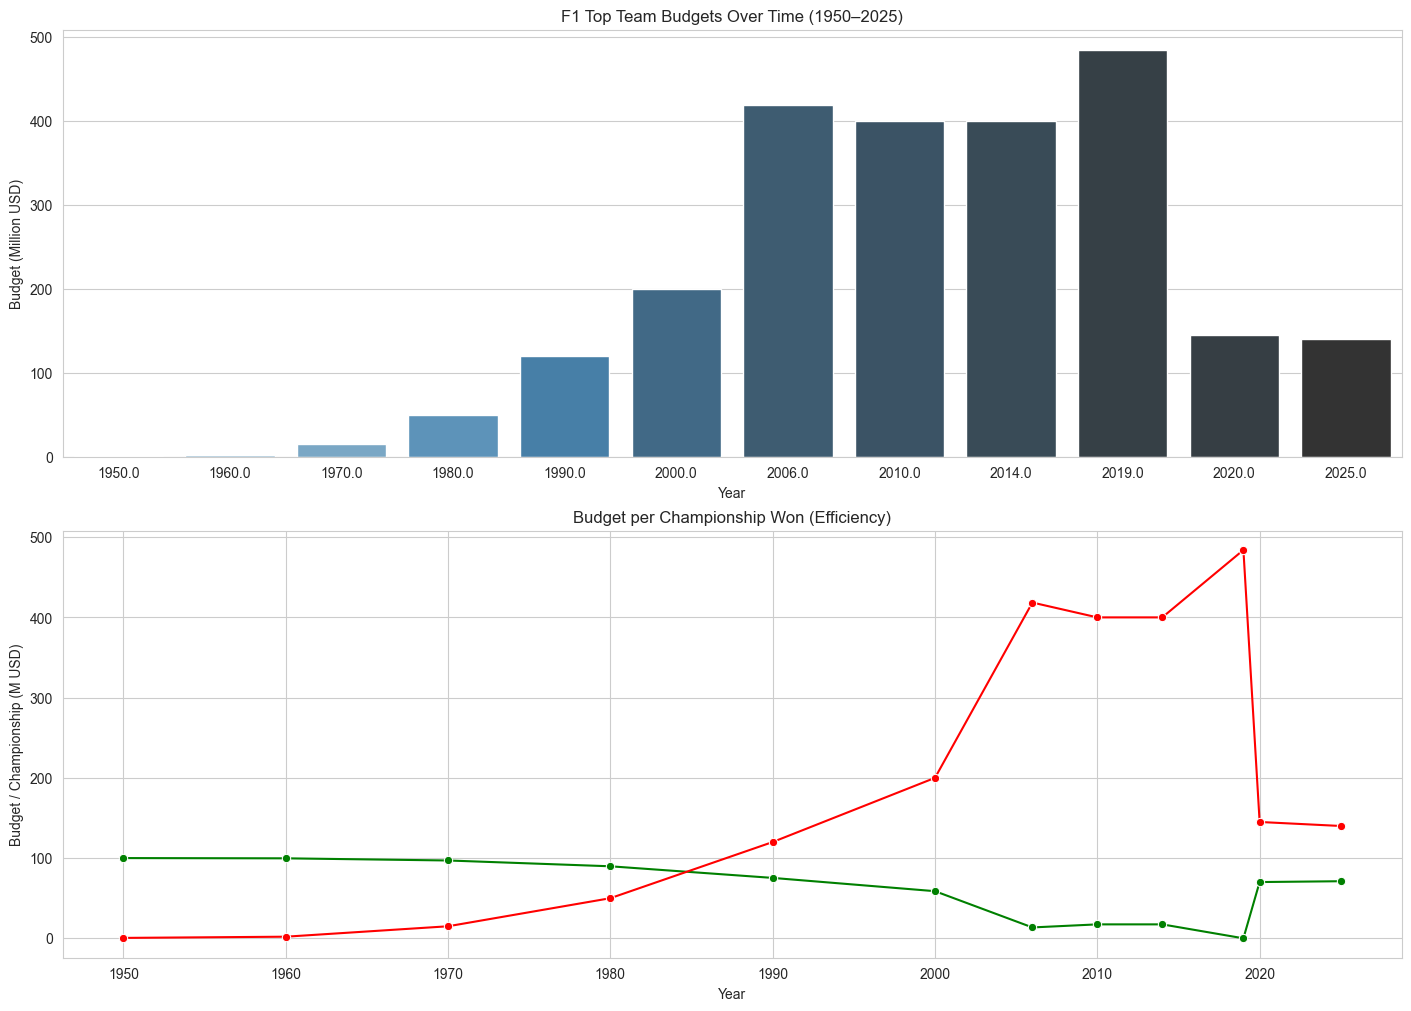

In [ ]:
data = np.array([
    [1950, 0.5, 1],
    [1960, 2, 1],
    [1970, 15, 1],
    [1980, 50, 1],
    [1990, 120, 1],
    [2000, 200, 1],
    [2006, 418.5, 1],
    [2010, 400, 1],
    [2014, 400, 1],
    [2019, 484, 1],
    [2020, 145, 1],
    [2025, 140, 1]
])
df = pd.DataFrame(data, columns=['Year', 'Budget_MUSD', 'Championships'])
df['Budget_per_Champ'] = df['Budget_MUSD'] / df['Championships']
fig, axs = plt.subplots(2, 1, figsize=(14, 10), constrained_layout=True)


sb.barplot(ax=axs[0], data=df, x='Year', y='Budget_MUSD', hue='Year', palette='Blues_d', legend=False)
axs[0].set_title('F1 Top Team Budgets Over Time (1950–2025)')
axs[0].set_ylabel('Budget (Million USD)')
axs[0].set_xlabel('Year')


df['Efficiency_pct'] = (df['Championships'] / df['Budget_MUSD']) * 100

eff_min = df['Budget_per_Champ'].min()
eff_max = df['Budget_per_Champ'].max()
df['Efficiency_pct'] = 100 * (eff_max - df['Budget_per_Champ']) / (eff_max - eff_min)
sb.lineplot(ax=axs[1], data=df, x='Year', y='Efficiency_pct', marker='o', color='green')
axs[1].set_title('Championship Efficiency (Normalized)')
axs[1].set_ylabel('Efficiency (%)')
axs[1].set_xlabel('Year')
sb.lineplot(ax=axs[1], data=df, x='Year', y='Budget_per_Champ', marker='o', color='red')
axs[1].set_title('Budget per Championship Won (Efficiency)')
axs[1].set_ylabel('Budget / Championship (M USD)')
axs[1].set_xlabel('Year')
plt.show()


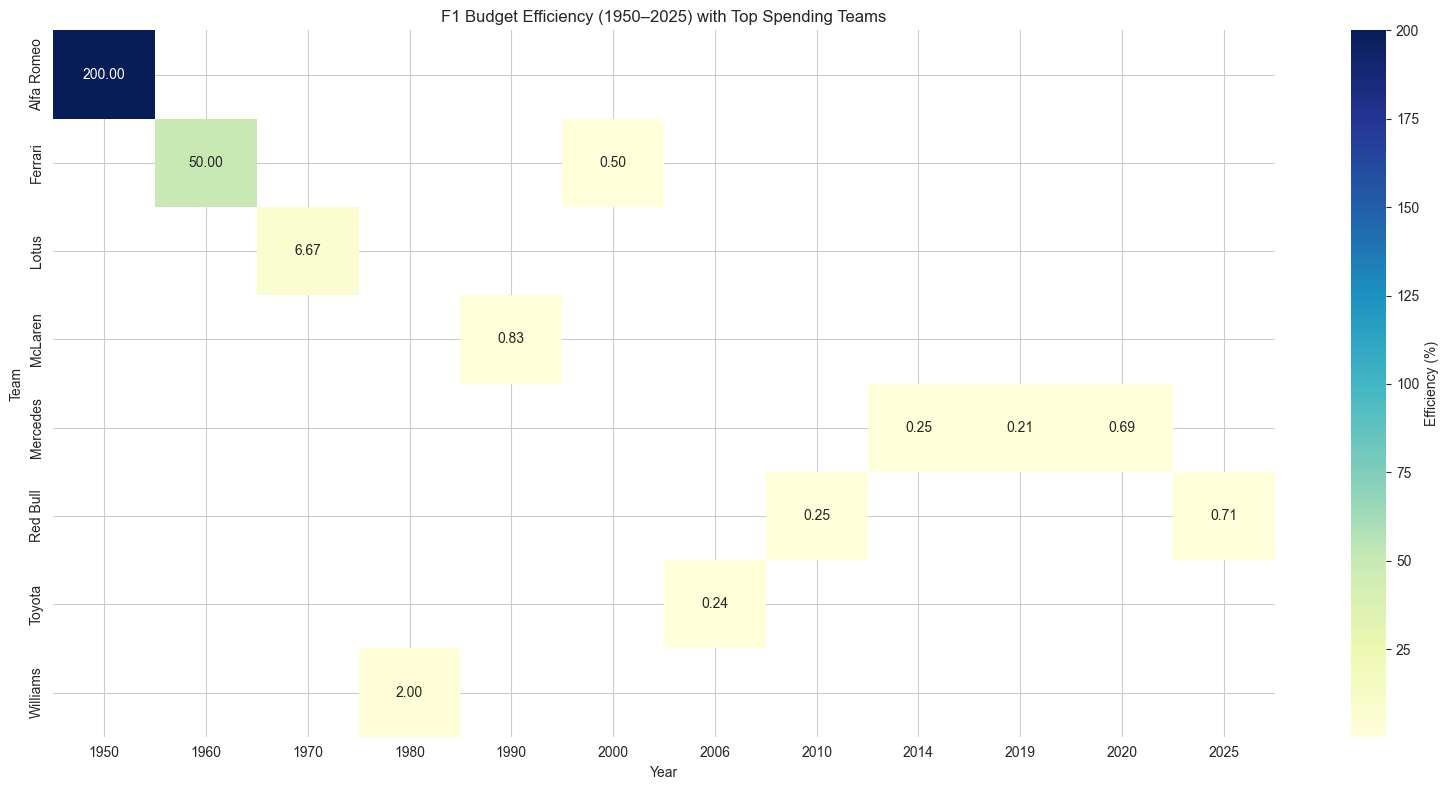

In [ ]:
data = np.array([
    [1950, 0.5, 1, "Alfa Romeo"],
    [1960, 2, 1, "Ferrari"],
    [1970, 15, 1, "Lotus"],
    [1980, 50, 1, "Williams"],
    [1990, 120, 1, "McLaren"],
    [2000, 200, 1, "Ferrari"],
    [2006, 418.5, 1, "Toyota"],
    [2010, 400, 1, "Red Bull"],
    [2014, 400, 1, "Mercedes"],
    [2019, 484, 1, "Mercedes"],
    [2020, 145, 1, "Mercedes"],
    [2025, 140, 1, "Red Bull"]
])

df = pd.DataFrame(data, columns=["Year", "Budget_MUSD", "Championships", "Team"])
df["Budget_MUSD"] = df["Budget_MUSD"].astype(float)
df["Championships"] = df["Championships"].astype(int)

# Compute Budget per Championship and Efficiency
df["Budget_per_Champ"] = df["Budget_MUSD"] / df["Championships"]
df["Efficiency"] = 1 / df["Budget_per_Champ"] * 100  # scaled for heatmap

# Pivot for heatmap
heatmap_data = df.pivot(index="Team", columns="Year", values="Efficiency")

# Plot
plt.figure(figsize=(16, 8))
ax = sb.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Efficiency (%)'})

# Annotations
plt.title("F1 Budget Efficiency (1950–2025) with Top Spending Teams")
plt.ylabel("Team")
plt.xlabel("Year")

plt.tight_layout()
plt.show()



# 5 How does the quality and degradation rate of different Pirelli tyre compounds affect pit strategy and race outcomes across various circuits?

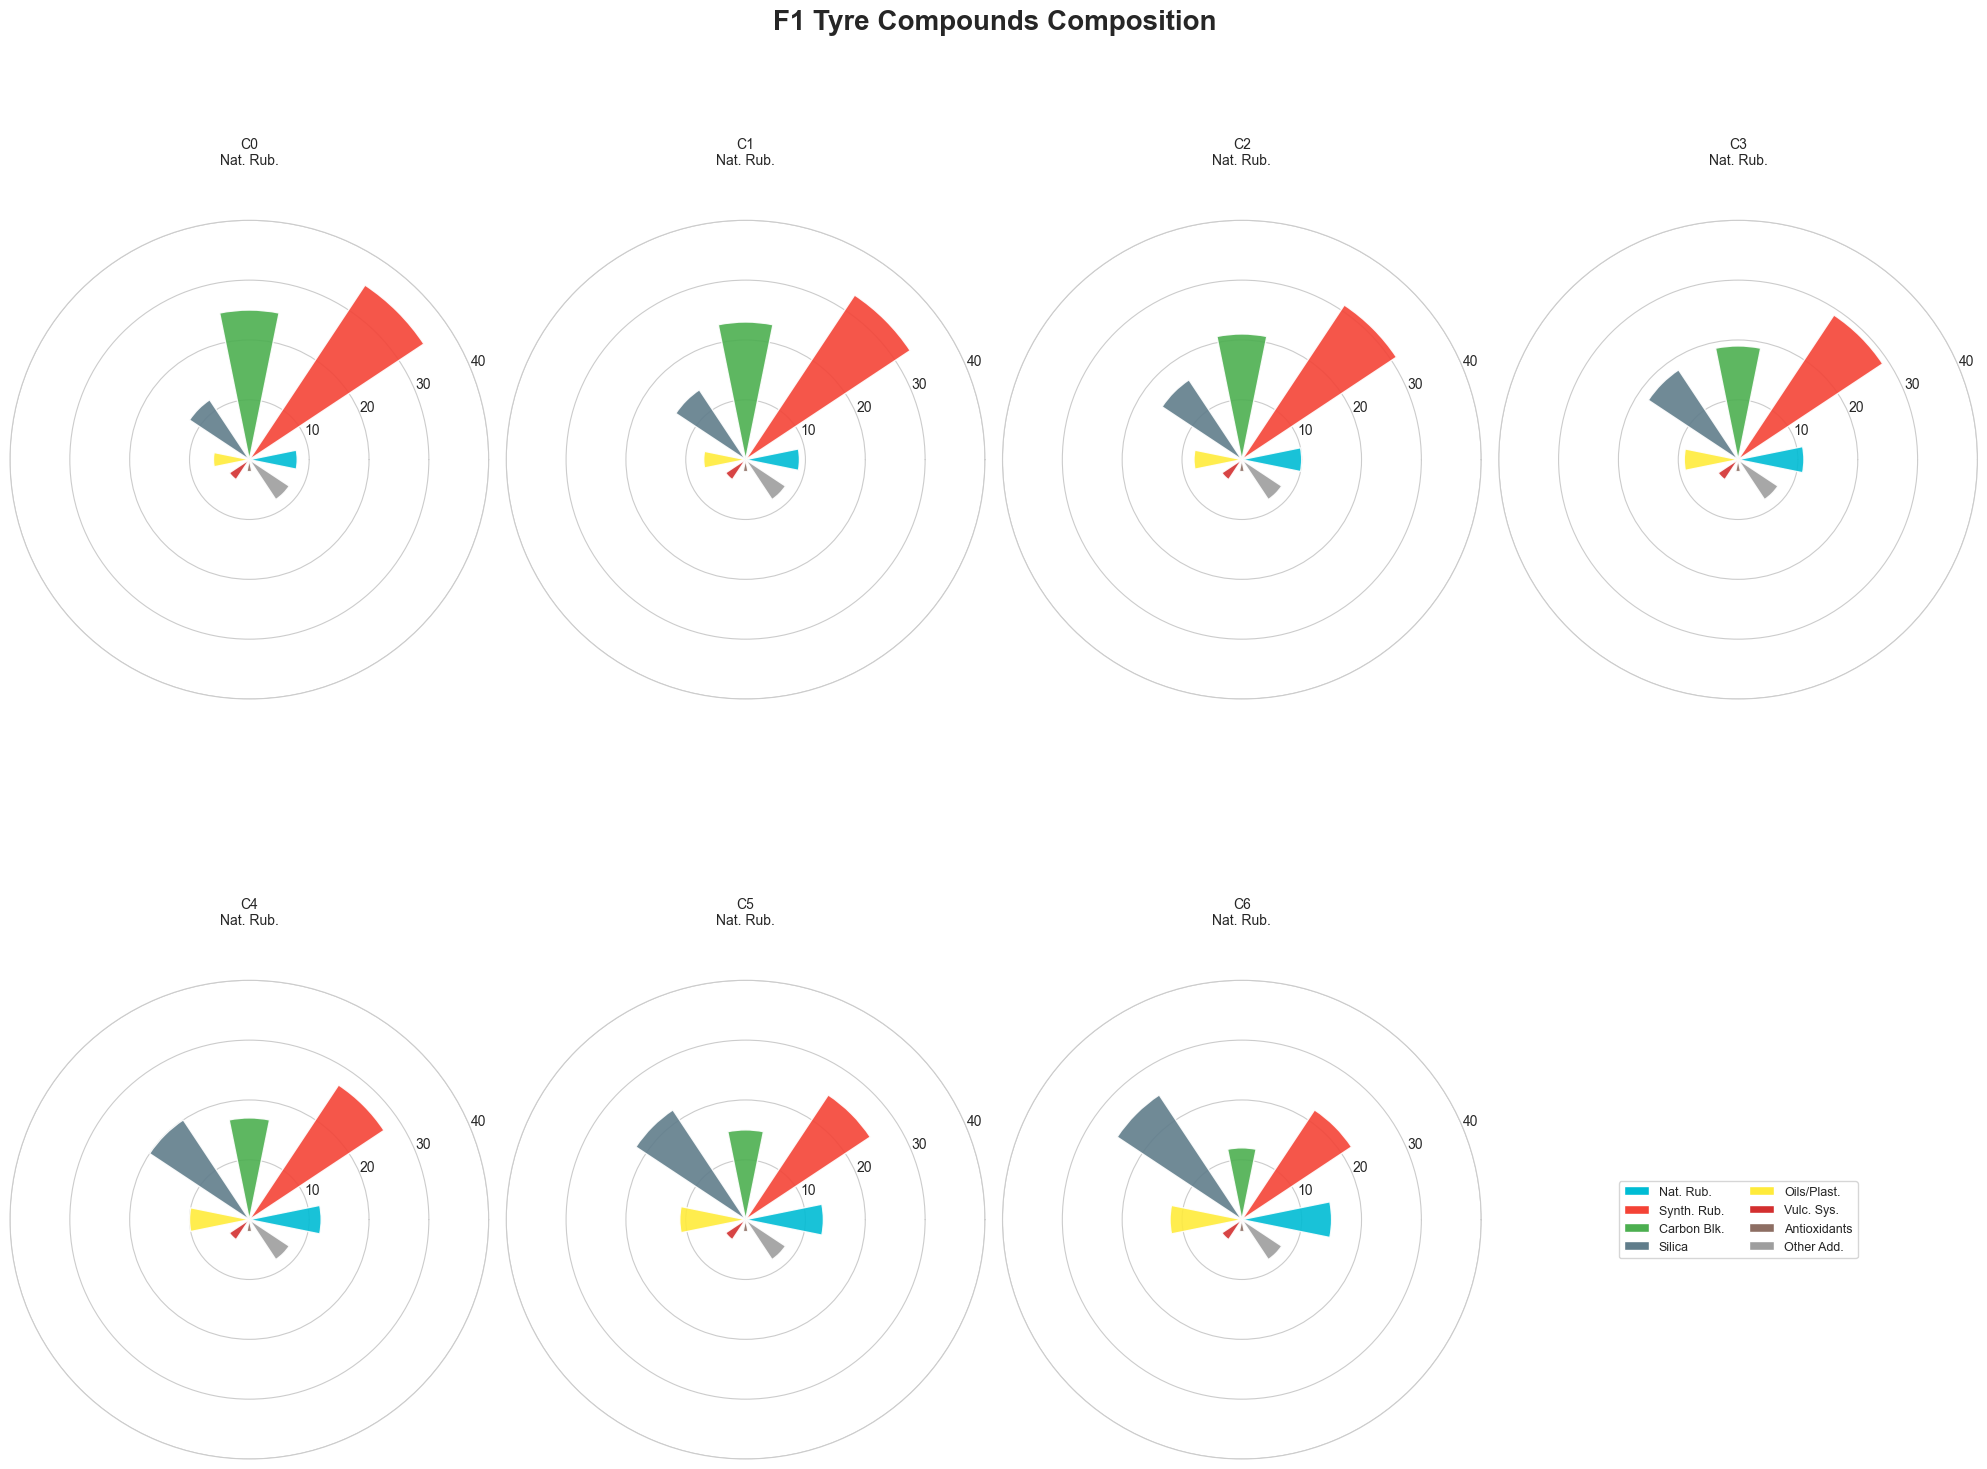

In [ ]:
file_path = 'F1_Tyre_Compounds_Complete.csv'
tyre_compounds = pd.read_csv(file_path)
tyre_compounds.head()
compounds = tyre_compounds['Compound'].values
components = [
    'Natural_Rubber_Percent', 'Synthetic_Rubber_Percent', 'Carbon_Black_Percent',
    'Silica_Percent', 'Oils_Plasticizers_Percent', 'Vulcanizing_System_Percent',
    'Antioxidants_Percent', 'Other_Additives_Percent'
]
component_labels = [
    "Nat. Rub.", "Synth. Rub.", "Carbon Blk.", "Silica",
    "Oils/Plast.", "Vulc. Sys.", "Antioxidants", "Other Add."
]
colors = [
    '#00BCD4', '#F44336', '#4CAF50', '#607D8B',
    '#FFEB3B', '#D32F2F', '#8D6E63', '#9E9E9E'
]

# Convert to numpy array
values = tyre_compounds[components].values

# Set up the plot
fig, axes = plt.subplots(2, 4, subplot_kw=dict(polar=True), figsize=(20, 18))
fig.suptitle("F1 Tyre Compounds Composition", fontsize=20, fontweight='bold', y=0.95)

angles = np.linspace(0, 2 * np.pi, len(components), endpoint=False).tolist()
angles += angles[:1]
for i, ax in enumerate(axes.flat[:-1]): 
    data = values[i].tolist()
    data += data[:1]  # close the loop

    for j in range(len(components)):
        val = values[i][j]
        theta = angles[j]
        ax.bar(theta, val, width=0.4, color=colors[j], alpha=0.9)

    ax.set_title(f"C{i}\nNat. Rub.", fontsize=10, y=1.1)
    ax.set_ylim(0, 40)
    ax.set_xticks([])
    ax.set_yticks([10, 20, 30, 40])
    ax.set_yticklabels(['10', '20', '30', '40'])

# Add legend in last subplot
legend_ax = axes.flat[-1]
legend_ax.set_axis_off()
for i, (label, color) in enumerate(zip(component_labels, colors)):
    legend_ax.bar(0, 0, color=color, label=label)
legend_ax.legend(loc='center', fontsize=9, ncol=2)

plt.tight_layout()
plt.show()


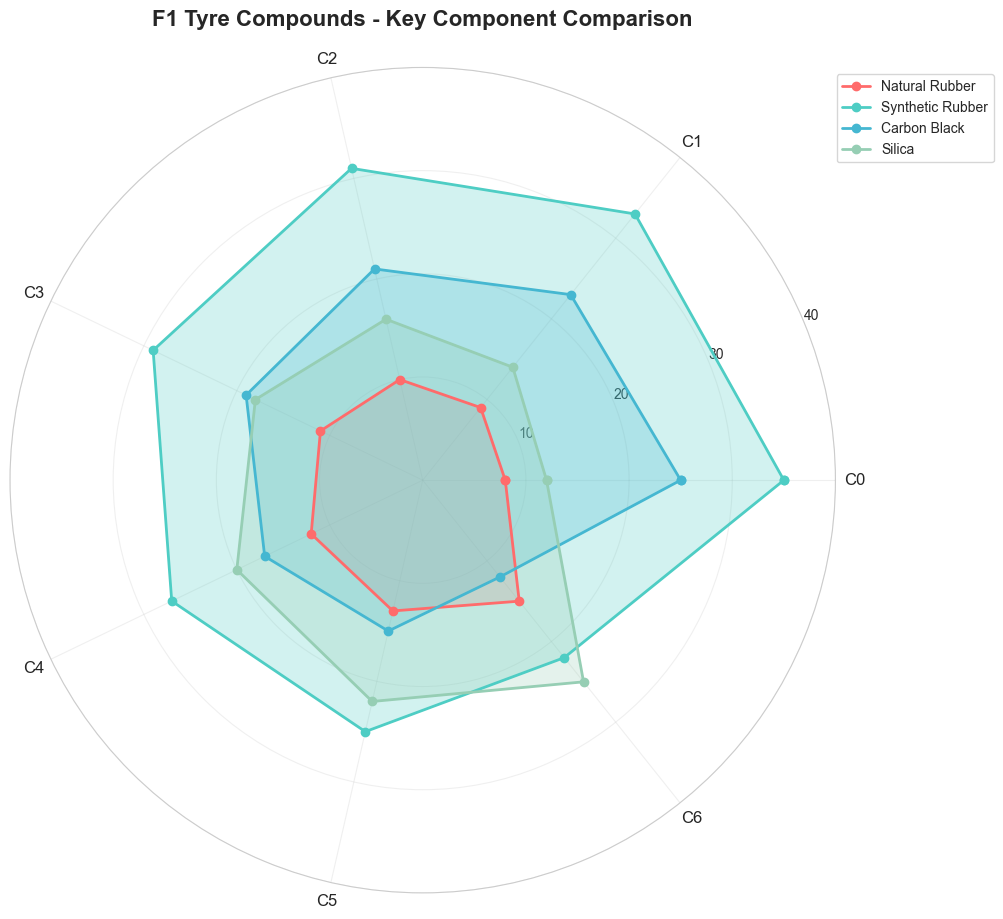

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('F1_Tyre_Compounds_Complete.csv')

# Set up the plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')

# Define compounds and angles
compounds = df['Compound'].tolist()
angles = np.linspace(0, 2 * np.pi, len(compounds), endpoint=False)

# Define key components and colors
key_components = ['Natural_Rubber_Percent', 'Synthetic_Rubber_Percent', 
                  'Carbon_Black_Percent', 'Silica_Percent']
component_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Plot each component line across compounds
for i, component in enumerate(key_components):
    values = df[component].values
    values = np.concatenate((values, [values[0]]))  # close the loop
    angles_closed = np.concatenate((angles, [angles[0]]))

    ax.plot(angles_closed, values, 'o-', linewidth=2,
            label=component.replace('_Percent', '').replace('_', ' '),
            color=component_colors[i])
    ax.fill(angles_closed, values, alpha=0.25, color=component_colors[i])

# Customize the plot
ax.set_xticks(angles)
ax.set_xticklabels(compounds, fontsize=12)
ax.set_ylim(0, 40)
ax.set_yticks([10, 20, 30, 40])
ax.set_title('F1 Tyre Compounds - Key Component Comparison',
             fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# F1 Tyre Allocation: Sprint vs. Regular Grand Prix Weekends (2025)

Tyre allocation for Formula 1 race weekends varies depending on whether it’s a standard Grand Prix or a Sprint event. The distribution covers all sessions from Free Practice through to the Grand Prix.

### Regular Grand Prix Weekend

Each driver receives:

- **13 sets of dry-weather (slick) tyres**:
    - 2 sets Hard (white)
    - 3 sets Medium (yellow)
    - 8 sets Soft (red)
- **4 sets of Intermediate tyres** (green)
- **3 sets of Full Wet tyres** (blue)

**During the weekend:**

- Sets must be returned after each Free Practice session (2 per session).
- One set of Soft tyres is reserved for Q3 in qualifying.
- At least two different slick compounds must be used during the Grand Prix if it remains dry[^1][^2][^3][^4].


### Sprint Weekend

Each driver receives:

- **12 sets of dry-weather (slick) tyres**:
    - 2 sets Hard (white)
    - 4 sets Medium (yellow)
    - 6 sets Soft (red)
- **5 sets of Intermediate tyres** (green)
- **2 sets of Full Wet tyres** (blue)

**Tyre usage specifics:**

- A new set of Mediums is mandatory for each of SQ1 and SQ2 during Sprint Shootout qualifying; Soft (new or used) required for SQ3[^1][^5][^3][^6][^7][^4].
- Free choice of tyres for both Sprint and Grand Prix races.
- After certain sessions, sets must be returned to Pirelli according to FIA rules.


### Summary Table: F1 Tyre Allocation by Weekend Type (2025)

| Session/Type | Dry Sets | Hard | Medium | Soft | Inter | Wet |
| :-- | :-- | :-- | :-- | :-- | :-- | :-- |
| Regular GP Weekend | 13 | 2 | 3 | 8 | 4 | 3 |
| Sprint Weekend | 12 | 2 | 4 | 6 | 5 | 2 |

- *Inter = Intermediate. Wet = Full Wet.*


### Key Points

- Each driver’s allocation is independent; tyres cannot be shared between teammates.
- The number and type of tyres available are strictly regulated and must be managed through all sessions from Free Practice (including Sprint, if present) to the Grand Prix itself.
- Wet-weather tyre allocation increases for Sprints, with five inters and two wets supplied.

This ensures both variety in strategy and parity among teams during every weekend format.


In [18]:
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# Load data
filename = 'F1_Circuit_Degradation_Data.csv'
df = pd.read_csv(filename)

# Clean and identify columns
df.columns = [c.strip() for c in df.columns]
degrad_col = [col for col in df.columns if 'degrad' in col.lower() and 'index' in col.lower()][0]
wear_col = [col for col in df.columns if 'wear' in col.lower() and 'lap' in col.lower()][0]
stint_col = [col for col in df.columns if ('stint' in col.lower() or 'length' in col.lower()) and 'lap' in col.lower()][0]
circuit_col = [col for col in df.columns if 'circuit' in col.lower()][0]

def abbreviate(name):
    return name[:15] if len(name) > 15 else name

# Sort and prepare data
sort_df = df.sort_values(degrad_col, ascending=False).reset_index(drop=True)
circuits = sort_df[circuit_col].apply(abbreviate)
deg_idx = sort_df[degrad_col]
wear_rate = sort_df[wear_col]
stint_len = sort_df[stint_col]

# Color coding
colors = ['#DB4545' if i >= 8 else '#D2BA4C' if i >= 5 else '#2E8B57' for i in deg_idx]

# Subplots
fig = sp.make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.06)

# Row 1: Degradation Index
fig.add_trace(go.Bar(
    x=circuits, y=deg_idx, marker_color=colors,
    text=deg_idx.round(2), textposition='auto', name='Degradation Index'
), row=1, col=1)

# Row 2: Wear Rate per Lap
fig.add_trace(go.Scatter(
    x=circuits, y=wear_rate, mode='lines+markers',
    line=dict(color='#1FB8CD'), marker=dict(size=8), name='Wear Rate'
), row=2, col=1)

# Row 3: Stint Length
fig.add_trace(go.Bar(
    x=circuits, y=stint_len, marker_color='#5D878F', name='Stint Length'
), row=3, col=1)

# Labels and grid
fig.update_layout(
    title='F1 Circuit Tyre Degradation Overview',
    title_x=0.5,
    height=800,
    showlegend=False,
    hovermode='x unified',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    font=dict(size=12),
    margin=dict(t=60, b=50)
)

fig.update_yaxes(title_text='Degrad. Index', row=1, col=1)
fig.update_yaxes(title_text='Wear Rate (s/lap)', row=2, col=1)
fig.update_yaxes(title_text='Avg Stint Length', row=3, col=1)
fig.update_xaxes(title_text='Circuit', row=3, col=1, tickangle=45)

# Grid
for r in [1, 2, 3]:
    fig.update_xaxes(showgrid=True, row=r, col=1)
    fig.update_yaxes(showgrid=True, row=r, col=1)
fig.show()